# <center>CPE 4903 Fall 2023: Homework 5 - Logistic Regression</center>

### Submission:
 * Submit this notebook file and the pdf version.
 * Deadline: 11:59 pm, 9/26

### Assignment Objective:

You are given a hypothetical graduate school admission record with two scores:

- GPA
- GRE
- Admit: 1: student was admitted, 0: student was rejected

Your mission is to build a classification model using logistic regression. You will perform a machine learning workflow that includes the model performance evaluation. 

#### <font color = red> You will be using the NumPy functions we developed in class to perform the tasks.</font> 

#### The function library is included in the file, `gradient_unil_lib.py`.  

## ML Workflow

- #### Step 1: Train-Test Data split 
- #### Step 2: Feature Selection
- #### Step 3: Train the model (training data) and make prediction (test data)
- #### Step 4: Regression Model Evaluation
- #### Step 5: Repeat the workflow until satisfactory performance is achieved

### Import Tools

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

import pandas as pd

%matplotlib inline

### Import Gradient Descent Algorithms that we implemented using NumPy

In [124]:
## Please import the necessary library functions from gradient_util_lib
from gradient_util_lib import *

## <font color=green>1. Load the Dataset and Check Out Data Statistics</font>

In [125]:
admission = pd.read_csv('admissions.csv')

* `admission` is a pandas __DataFrame__ that contains the dataset, including the column labels.

### This displays the first 5 rows of the DataFrame.

In [126]:
# Please write your code.
admission.head(5)

,GPA,GRE,Admit
0,3.177277,594.102992,0
1,3.412655,631.528607,0
2,2.728097,553.714399,0
3,3.093559,551.089985,0
4,3.141923,537.184894,0


### This describes the basic information of the DataFrame

In [127]:
## Please write your code.
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GPA     644 non-null    float64
 1   GRE     644 non-null    float64
 2   Admit   644 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


### This displays the statistics for each numerical column

In [128]:
## Please write your code.
admission.describe()

,GPA,GRE,Admit
count,644.000000,644.000000,644.000000
mean,3.239936,612.923057,0.378882
std,0.291907,76.637990,0.485486
min,2.177100,390.363563,0.000000
25%,3.045036,560.596793,0.000000
50%,3.234650,612.104848,0.000000
75%,3.448415,663.094697,1.000000
max,4.000000,800.000000,1.000000


### Visualize the Data: GRE score vs. PGA
- The code below displays the data on a scatter plot (as shown below), where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

In [129]:
y_0 = admission[admission.Admit == 0]

y_1 = admission[admission.Admit == 1]

### Question: How many students were admitted?

In [130]:
## Please write your code.
print(f'{len(y_1)} students were admitted.')

244 students were admitted.


### Run the cell below to display the scatter plot for the two features.

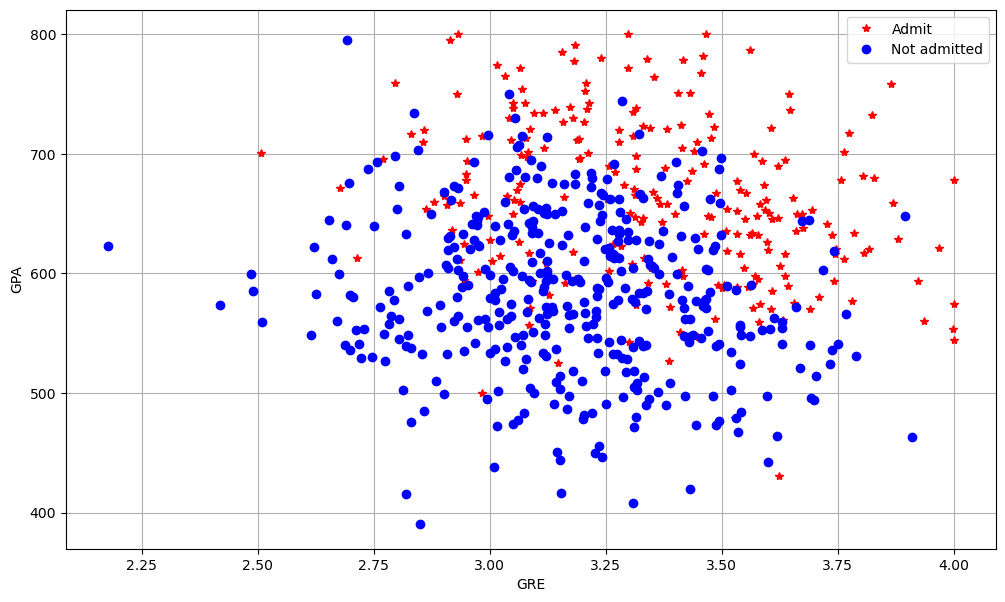

In [131]:
plt.figure(figsize=(12,7))

plt.plot(y_1['GPA'], y_1['GRE'],'r*',label='Admit')
plt.plot(y_0['GPA'], y_0['GRE'],'bo', label='Not admitted')
plt.xlabel('GRE')
plt.ylabel('GPA')

plt.legend()
plt.grid()
plt.show()

## <font color=green>3. Train-Test Data Split</font>

#### Before building a logistic regression model, let's start by splitting the data into a training set and test set.


### Load <font color=blue>Scikit Learn</font> ML packages

In [132]:
### Load the proper package here.
from sklearn.model_selection import train_test_split

### We create the input features ($X$) and target value ($y$).

In [133]:
## Write your code.
X = admission.drop('Admit', axis=1)
y = admission['Admit']

## <font color=green>3.1 Feature Scaling: Z-Score Normalization</font>

In [134]:
## Write your code.
 
X, _ , _ = zscore_normalize(X)


### Now we create Train and Test sets from $X$ and $y$ data.

In [135]:
## Write your code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#### Check out the shape of X_train & X_test

In [136]:
## Write your code.
print(f'X_train: {X_train.shape} \nX_test: {X_test.shape}')

X_train: (450, 2) 
X_test: (194, 2)


## <font color=green>4. Training a Logistic Regression Model</font>

### The training model is given by $f(\hat{y}) = \frac{1}{1 + e^{-(a_0 + a_1x_1 + a_2x_2)}}$, where $x_1$= `GPA`, $x_2$= `GRE`

### <font color=green>4.1 Train the Model Using NumPy GD Implementation</font> 

### Feature Matrix for Training Data

In [137]:
## Write your code

X_train.insert(0, 'X_0', 1)
X_train

,X_0,GPA,GRE
214,1,0.026944,-1.232283
74,1,1.748064,-0.933636
375,1,0.285170,0.693573
364,1,0.373135,-0.090820
61,1,-0.651311,-0.142614
...,...,...,...
129,1,0.701043,-1.820596
144,1,-1.892582,-0.951800
72,1,-0.422954,0.488364
235,1,-1.015189,-1.009979


### Gradient Descent

The following `regression routines` are cores for running gradient descent.
- __`compute_cost_logistic`__
- __`compute_gradient_logistic`__
- __`gradient_descent`__

### Initializing (hyper)parameters

In [138]:
## Write your code 
A_in = np.array([1, 1 ,1])
A_in.shape

(3,)

### Run the GD algorithm

In [139]:
## Write your code
A, J_history = gradient_descent(X_train, y_train, A_in, compute_cost_logistic, compute_gradient_logistic, 0.0001, 20000)

        0 7.56062e-01


     2000 7.37485e-01
     4000 7.20131e-01
     6000 7.03926e-01
     8000 6.88799e-01
    10000 6.74684e-01
    12000 6.61516e-01
    14000 6.49236e-01
    16000 6.37788e-01
    18000 6.27118e-01


### What are the optimal values of the weight vector, $a_0, a_1, a_2$?

In [140]:
## Write your code
print(f'a0 = {A[0]:.04f}, a1 = {A[1]:.04f}, a2 = {A[2]:.04f}')

a0 = 0.4850, a1 = 0.9517, a2 = 1.0860


### Make prediction for new data point

<font color=green>__A student has a 3.5 GPA and scores 700 in GPE, what is the probability of him getting admitted?__</font>

In [141]:
## Write your code
sample = np.array([1, 3.5, 700])
z = predict_logistic(sample, A)
print(f'There are {(z * 100):.4f}% chances of the student being admitted.')

There are 100.0000% chances of the student being admitted.


### <font color=green>4.2 Prediction of the Test Data by the Model</font>

### Feature Matrix for Training Data

In [142]:
X_test.insert(0, 'X_0', 1)

In [143]:
## Write your code
X_train

,X_0,GPA,GRE
214,1,0.026944,-1.232283
74,1,1.748064,-0.933636
375,1,0.285170,0.693573
364,1,0.373135,-0.090820
61,1,-0.651311,-0.142614
...,...,...,...
129,1,0.701043,-1.820596
144,1,-1.892582,-0.951800
72,1,-0.422954,0.488364
235,1,-1.015189,-1.009979


### Calculate the predicted class probability 

In [144]:
## Write your code
X_test_prediction = predict_logistic(X_test, A)
X_test_prediction

array([0.43283784, 0.66694473, 0.3009878 , 0.20172296, 0.91657103,
       0.78455846, 0.77335733, 0.90361963, 0.7978    , 0.64654851,
       0.30126688, 0.89553641, 0.8577563 , 0.68294507, 0.05542635,
       0.38800929, 0.48655951, 0.57355046, 0.74185878, 0.360823  ,
       0.31748353, 0.75930239, 0.88246352, 0.13365576, 0.33707004,
       0.44156221, 0.77710866, 0.12484443, 0.90689532, 0.69951157,
       0.86524848, 0.20473012, 0.89516113, 0.68731827, 0.97258312,
       0.91455135, 0.84972029, 0.52680743, 0.85653958, 0.49520091,
       0.75015441, 0.90438599, 0.41470077, 0.02438853, 0.28035598,
       0.0575434 , 0.83211767, 0.77615154, 0.31039508, 0.41641942,
       0.74918345, 0.45527386, 0.66260734, 0.77738869, 0.74934933,
       0.13970503, 0.6451237 , 0.77607864, 0.634849  , 0.5267119 ,
       0.81709721, 0.10768841, 0.87660748, 0.41206112, 0.89626111,
       0.18725913, 0.77696654, 0.91990465, 0.33164001, 0.89410954,
       0.87795875, 0.64075891, 0.96708901, 0.90140887, 0.50341

### Classify the predicted value to `class 0` or `class 1`

In [145]:
## Write your code
X_test_prediction = np.round(X_test_prediction)
X_test_prediction = X_test_prediction.astype(int)
X_test_prediction

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

## <font color=green>6. Regression Model Evaluation Metrics</font>

We will use the **Confusion Matrix** and **Classification Report** to examine the logistic model performance. 

TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative

 ### * Precision = $\frac{TP}{(TP + FP)}$ 
 ### * Negative Precision = $\frac{TN}{(TN + FN)}$
 
 ### * Recall (Sensitivity) = $\frac{TP}{(TP + FN)}$ 
 
 ### * Specificity = $\frac{TN}{(TN + FP)}$

 ### * f1-score = $\frac{2*\text{Precision * Recall}}{\text{Precision + Recall}}$ for both Negative and Positive Classes! 

`Support` = Total Number of Actual Negative and Poisitive Classes.

### Import <font color=blue>Scikit Learn</font> ML packages for confusion matrix and classification report

In [153]:
# Write your code
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Print the Confusion Matrix in the format: TP=10, FN=1, FP=3, TN=30 

In [152]:
# Write your code
c = confusion_matrix(y_test, X_test_prediction, labels=[1,0])
print (f'TP={c[0,0]}, FN={c[0,1]}, FP={c[1,0]}, TN={c[1,1]}')

TP=72, FN=4, FP=50, TN=68


### Print the Classification report

In [155]:
# Write your code
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.94      0.58      0.72       118
           1       0.59      0.95      0.73        76

    accuracy                           0.72       194
   macro avg       0.77      0.76      0.72       194
weighted avg       0.81      0.72      0.72       194



###  Question: What about the performance for the <font color=blue>training data?  </font>

Please repeat the same performance evaluation procedure for the training data

In [156]:
# Write your code
X_train_prediction = predict_logistic(X_train, A)
X_train_prediction = np.round(X_train_prediction)
X_train_prediction = X_train_prediction.astype(int)
X_train_prediction

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,

In [157]:
c = confusion_matrix(y_train, X_train_prediction, labels=[1,0])
print (f'TP={c[0,0]}, FN={c[0,1]}, FP={c[1,0]}, TN={c[1,1]}')

TP=147, FN=21, FP=142, TN=140


In [158]:
print(classification_report(y_train, X_train_prediction))

              precision    recall  f1-score   support

           0       0.87      0.50      0.63       282
           1       0.51      0.88      0.64       168

    accuracy                           0.64       450
   macro avg       0.69      0.69      0.64       450
weighted avg       0.73      0.64      0.64       450

